In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Melbourne Housing Project

## Data Import & Visualization

In [422]:
mel_house = pd.read_csv("Melbourne_housing_FULL.csv", delimiter=",")

In [423]:
mel_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [424]:
mel_house.shape

(34857, 21)

In [425]:
mel_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

The Dataframe has 34857 rows and 21 columns.

Some columns have a lot of null values such as YearBuilt, Building Area. (roughly 20000 or more null rows, more than 2/3 of the data)

Some other columns have very few null values such as Regionname, Property Count (only 3 missing values)

For columns with 8000 null values or more, they will be dropped first, Price will be an exception for now.

In [426]:
mel_house_col = mel_house.drop(columns=["BuildingArea", "YearBuilt"])

In [427]:
mel_house_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

For columns with fewer null rows, the rows will be dropped instead.

For price, the null rows are not useful since Price is a target, and thus the null rows will also be dropped.

In [428]:
mel_house_dropna = mel_house_col.dropna()

In [429]:
mel_house_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         17679 non-null  object 
 1   Address        17679 non-null  object 
 2   Rooms          17679 non-null  int64  
 3   Type           17679 non-null  object 
 4   Price          17679 non-null  float64
 5   Method         17679 non-null  object 
 6   SellerG        17679 non-null  object 
 7   Date           17679 non-null  object 
 8   Distance       17679 non-null  float64
 9   Postcode       17679 non-null  float64
 10  Bedroom2       17679 non-null  float64
 11  Bathroom       17679 non-null  float64
 12  Car            17679 non-null  float64
 13  Landsize       17679 non-null  float64
 14  CouncilArea    17679 non-null  object 
 15  Lattitude      17679 non-null  float64
 16  Longtitude     17679 non-null  float64
 17  Regionname     17679 non-null  object 
 18  Proper

In [430]:
pricecol = mel_house_dropna['Price']
features = mel_house_dropna.drop(columns=['Price'])
features_numeric = features.select_dtypes(exclude=['object'])
features_categorical = features.select_dtypes(include=['object'])

In [431]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         17679 non-null  object 
 1   Address        17679 non-null  object 
 2   Rooms          17679 non-null  int64  
 3   Type           17679 non-null  object 
 4   Method         17679 non-null  object 
 5   SellerG        17679 non-null  object 
 6   Date           17679 non-null  object 
 7   Distance       17679 non-null  float64
 8   Postcode       17679 non-null  float64
 9   Bedroom2       17679 non-null  float64
 10  Bathroom       17679 non-null  float64
 11  Car            17679 non-null  float64
 12  Landsize       17679 non-null  float64
 13  CouncilArea    17679 non-null  object 
 14  Lattitude      17679 non-null  float64
 15  Longtitude     17679 non-null  float64
 16  Regionname     17679 non-null  object 
 17  Propertycount  17679 non-null  float64
dtypes: flo

In [432]:
mel_house_dropna['Postcode'].unique().size

204

Separating the features of the data into two types: numeric and categorical.

Postal code is not very useful as a continuous feature (i.e. a bigger postal number does not imply any feature of the house) and therefore it will be included as a categorical feature.

In [433]:
features_numeric = features_numeric.drop(columns=['Postcode'])

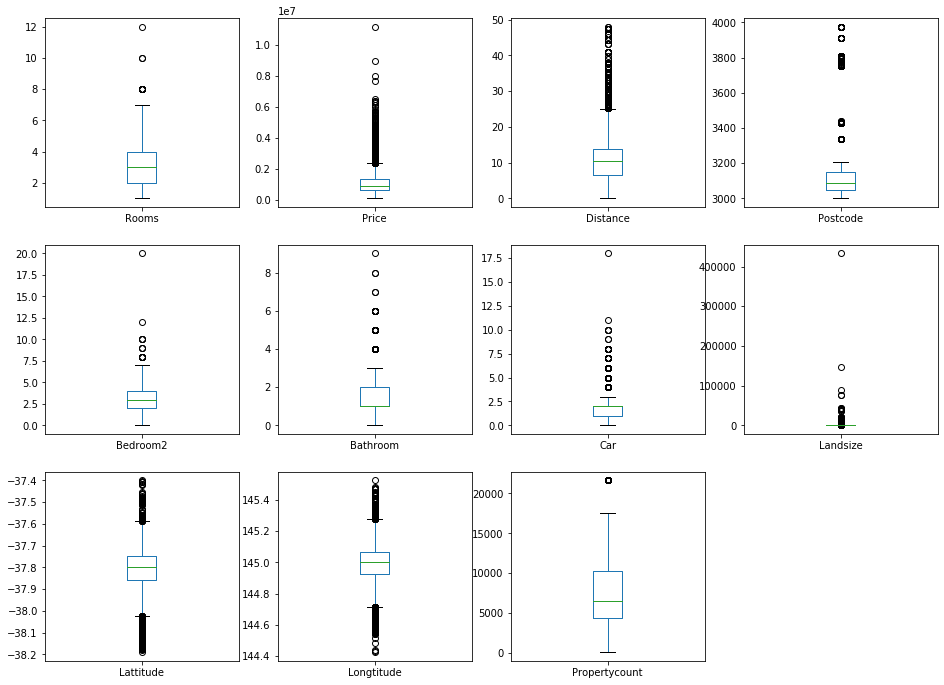

In [434]:
mel_house_dropna.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,16))
plt.show()

Here, I made a series of boxplots to take a look at the distribution of each column in the data.

Most boxplots have a typical distribution, but there seems to be some outliers. There seems to be one or more houses with a very large landsize. It could be a very large house since there are also abnormally large values in the number of car parking slots, bedrooms and bathrooms.

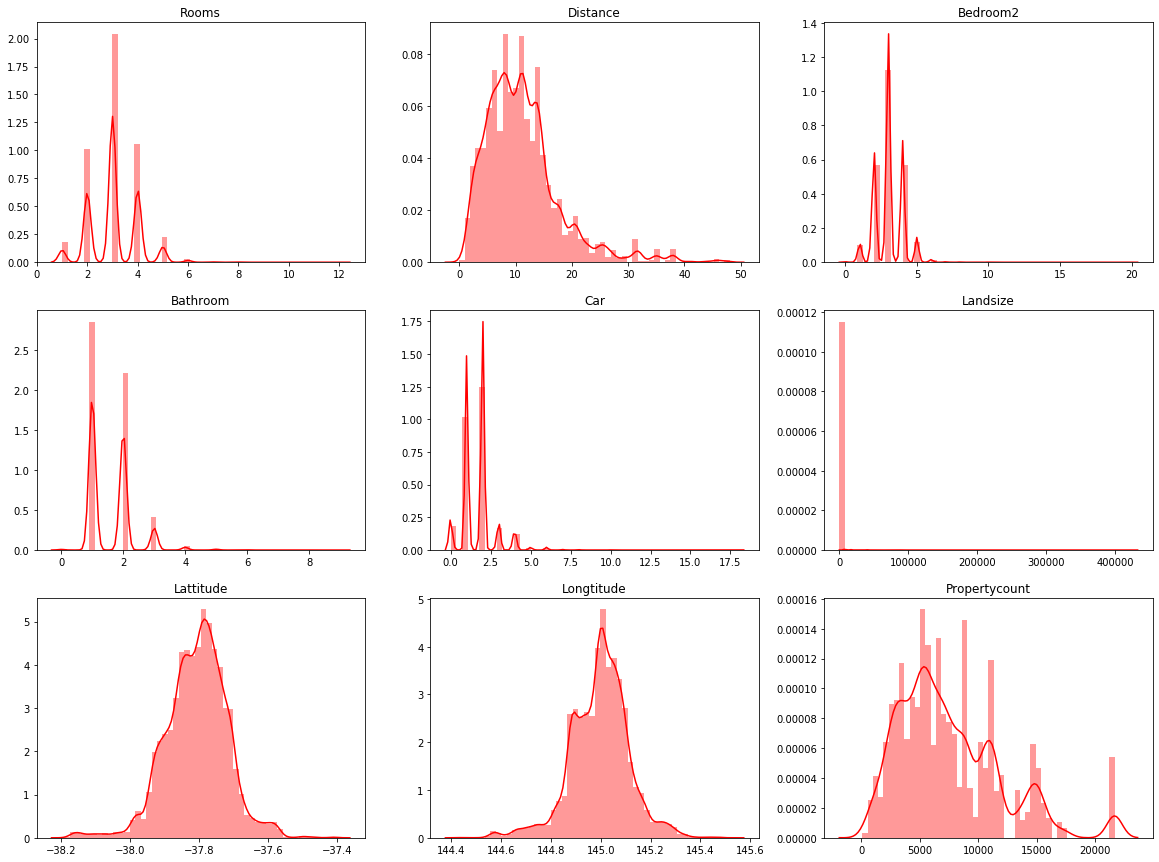

In [435]:
f, axes = plt.subplots(3, 3, figsize=(20,15), sharex=False)
index = 0;
for i in range(3):
    for j in range(3):
        if index < 9:
            sns.distplot(features_numeric.values[:,index], hist=True, color="red", ax=axes[i,j]).set_title(features_numeric.columns[index])
            index = index+1

The distribution plots show that some columns are distributed normally, while some others have very large clusters around certain values (rooms, bathrooms, cars)

In [436]:
pricecol.describe()

count    1.767900e+04
mean     1.094974e+06
std      6.559815e+05
min      8.500000e+04
25%      6.600000e+05
50%      9.125000e+05
75%      1.345000e+06
max      1.120000e+07
Name: Price, dtype: float64

Although they have abnormally large landsize, they do not necessarily have the highest price. They might be taken into consideration for outlier elimination.

## Applying Linear Regression

In this section, I shall apply sklearn's Linear Regression model to predict the price of the houses.

In [437]:
# Importing libraries
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold

#Splitting dataset into train and test sets with 8:2 ratio
trainX, testX, trainY, testY = train_test_split(features_numeric, pricecol, test_size=0.2)

In [438]:
#Checking train and test data shapes
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(14143, 9)
(3536, 9)
(14143,)
(3536,)


In [439]:
from sklearn import linear_model
#training the model
linReg = linear_model.LinearRegression()
linReg.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [440]:
# Make predictions with model
predY = linReg.predict(testX)

In [441]:
# obtain and print the scores
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
mse = mean_squared_error(testY, predY)
r2 = r2_score(testY, predY)
evs = explained_variance_score(testY, predY)
print("MSE: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Explained Variance Score: {}".format(evs))

MSE: 242308733911.09998
R2 Score: 0.4555348649878548
Explained Variance Score: 0.4556505275935412


The model obtained a very large mean squared error and fairly low R2 and Explained Variance Score (0.46) and it can be concluded that the model did not do very well.

I shall now plot the residuals of the predictions. For example, Distance against Residue.

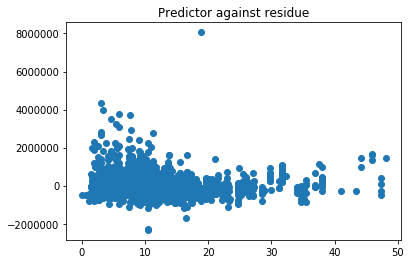

In [442]:
fig, ax = plt.subplots()
ax.scatter(testX['Distance'], testY - predY)
plt.title('Predictor against residue')
plt.show()

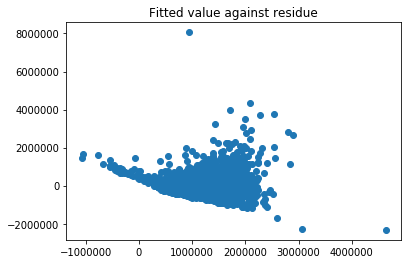

In [443]:
fig, ax = plt.subplots()
ax.scatter(predY, testY - predY)
plt.title('Fitted value against residue')
plt.show()

The scatter plot of predictor against residue shows that there is a very large outlier, and that there are clusters formed around some values of x.

The homoscedasticity plot shows that the variance is increasing and it means that the problem does not respect the homoscedasticity. Some variable transformation might be needed.

Now, we proceed to K-fold cross-validation.

In [444]:
# create a KFold object with number of splits = 5
kFold = KFold(n_splits=5, shuffle=True, random_state = 100)
linReg = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(linReg, features_numeric, pricecol, scoring='r2', cv=kFold, n_jobs=-1)
# report performance
print('R2 Score: %.3f (%.3f)' % (scores.mean(), scores.std()))

R2 Score: 0.456 (0.008)


The R2 score obtained from K-Fold cross validation is fairly consistent (roughly 0.46). This means that 46% of the variance of Price can be explained by the features.

## Applying PCA

Text(0, 0.5, 'cumulative explained variance')

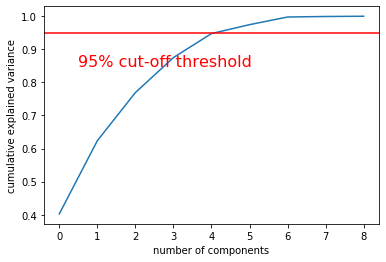

In [445]:
# importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(features_numeric)

pca = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Since we want to capture 95 to 99% of the explained variance, we will use number of components = 4

In [446]:
# Transform the data with PCA
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features_numeric)

In [447]:
#training the model again with the same procedure
linReg = linear_model.LinearRegression()
#Splitting dataset into train and test sets with 8:2 ratio
trainX, testX, trainY, testY = train_test_split(features_pca, pricecol, test_size=0.2)
linReg.fit(trainX, trainY)
# Make predictions with model
predY = linReg.predict(testX)
mse = mean_squared_error(testY, predY)
r2 = r2_score(testY, predY)
evs = explained_variance_score(testY, predY)
print("MSE: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Explained Variance Score: {}".format(evs))

MSE: 274129738754.3545
R2 Score: 0.37861967919518313
Explained Variance Score: 0.37868268680178896


Lastly, I will confirm the results of PCA with k-fold cross-validation.

In [448]:
# create a KFold object with number of splits = 5
kFold = KFold(n_splits=5, shuffle=True, random_state = 100)
linReg = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(linReg, features_pca, pricecol, scoring='r2', cv=kFold, n_jobs=-1)
# report performance
print('R2 Score: %.3f (%.3f)' % (scores.mean(), scores.std()))

R2 Score: 0.361 (0.010)


The average accuraccy obtained is 0.36, which is fairly lower than that of the model before applying PCA.

For this question, I conclude that the result of PCA was not very satisfying.